In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('bank.csv' , sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.duplicated().sum()

0

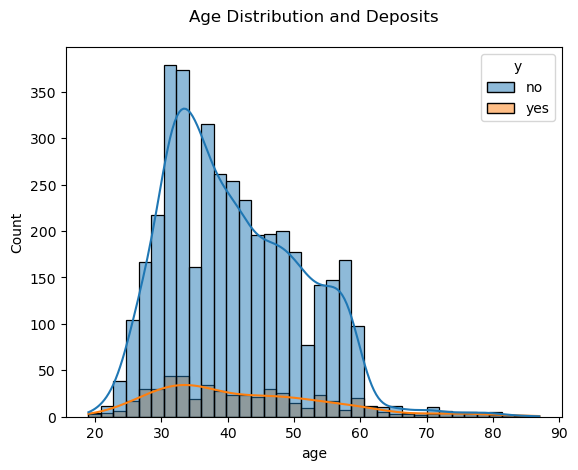

In [8]:
sns.histplot(x="age", data=df, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

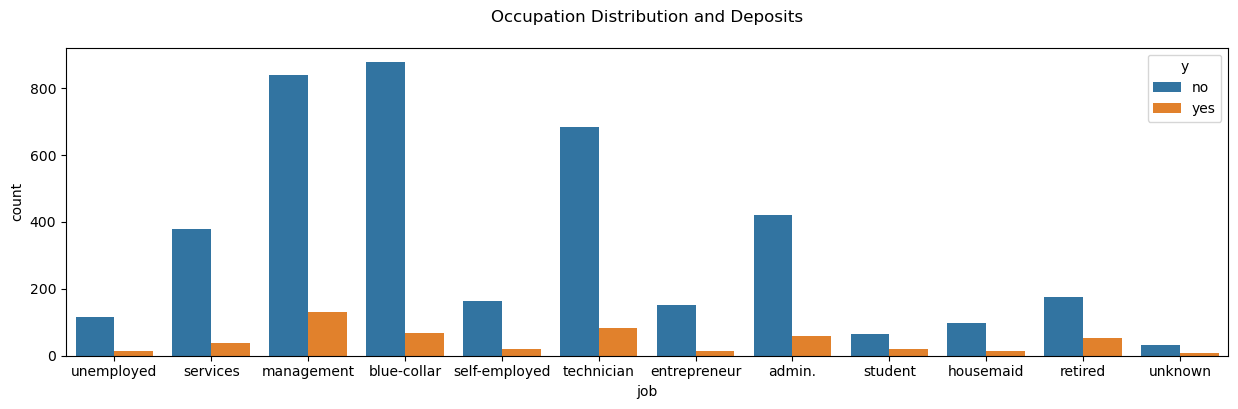

In [9]:
plt.figure(figsize=(15,4))
sns.countplot(x = 'job' , data = df , hue = 'y')
plt.title("Occupation Distribution and Deposits\n")
plt.show()

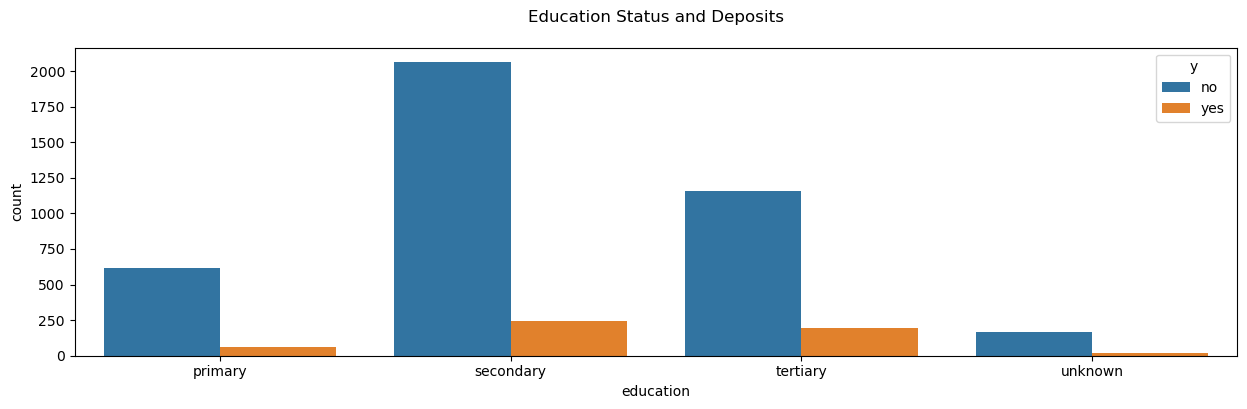

In [10]:
plt.figure(figsize=(15,4))
sns.countplot(x = 'education' , data = df , hue = 'y')
plt.title("Education Status and Deposits\n")
plt.show()

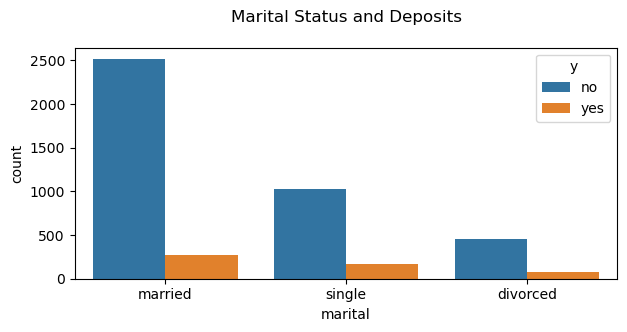

In [11]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= df, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

In [12]:
df['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

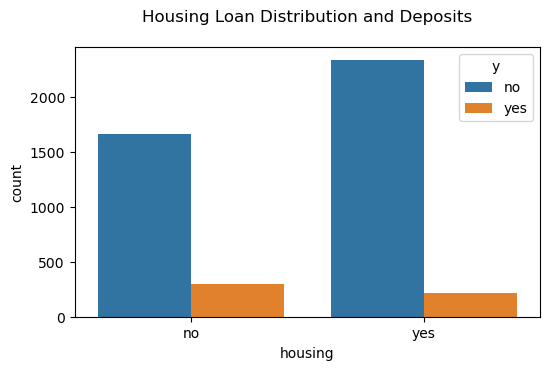

In [13]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= df, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

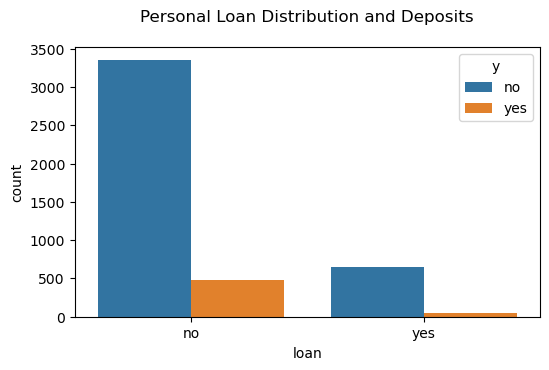

In [14]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= df, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

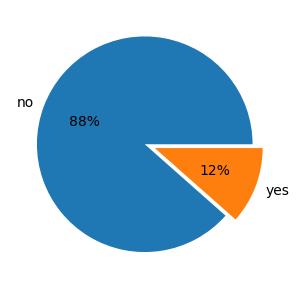

In [15]:
df.y.value_counts()
keys = df.y.value_counts().index
data = df.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

12% of clients have subscribed to Term Deposit

### Label Encoding Categorical Features

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [17]:
cols = df.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [18]:
le = LabelEncoder()

In [19]:
df[cols] = df[cols].apply(le.fit_transform)

In [20]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


### Correlation Analysis using Heatmap

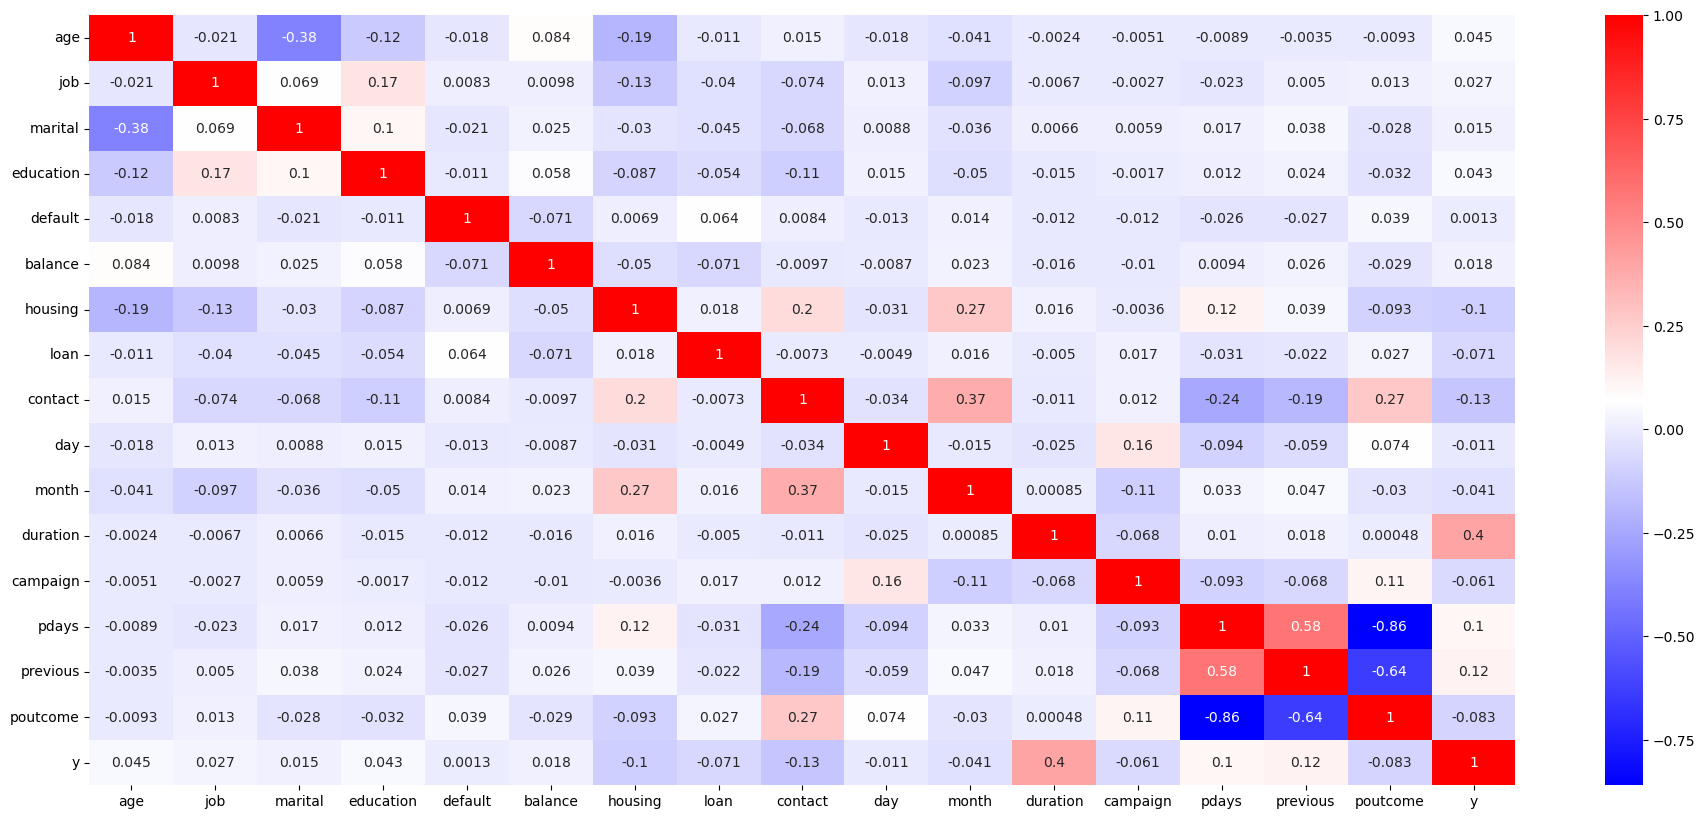

In [21]:
plt.figure(figsize=(23,10))
sns.heatmap(df.corr(), cmap='bwr', annot=True)
plt.show()

### Standardisation

In [22]:
x = df.drop("y" , axis = 1)
y = df.y

In [23]:
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

### Model building - Decision Tree Classifier

In [24]:
train_x, test_x, train_y, test_y = train_test_split(x_scaled, y, test_size=0.3)

In [25]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [26]:
print('Train Score: {}'.format(decision_tree.score(train_x, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_x, test_y)))

Train Score: 1.0
Test Score: 0.8636698599852616


In [27]:
cross_val_score(decision_tree, train_x, train_y, cv=5).mean()

0.8729427880096786

In [28]:
ypred = decision_tree.predict(test_x)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1194
           1       0.43      0.39      0.41       163

    accuracy                           0.86      1357
   macro avg       0.67      0.66      0.66      1357
weighted avg       0.86      0.86      0.86      1357



In [29]:
print(confusion_matrix(test_y,ypred))

[[1109   85]
 [ 100   63]]


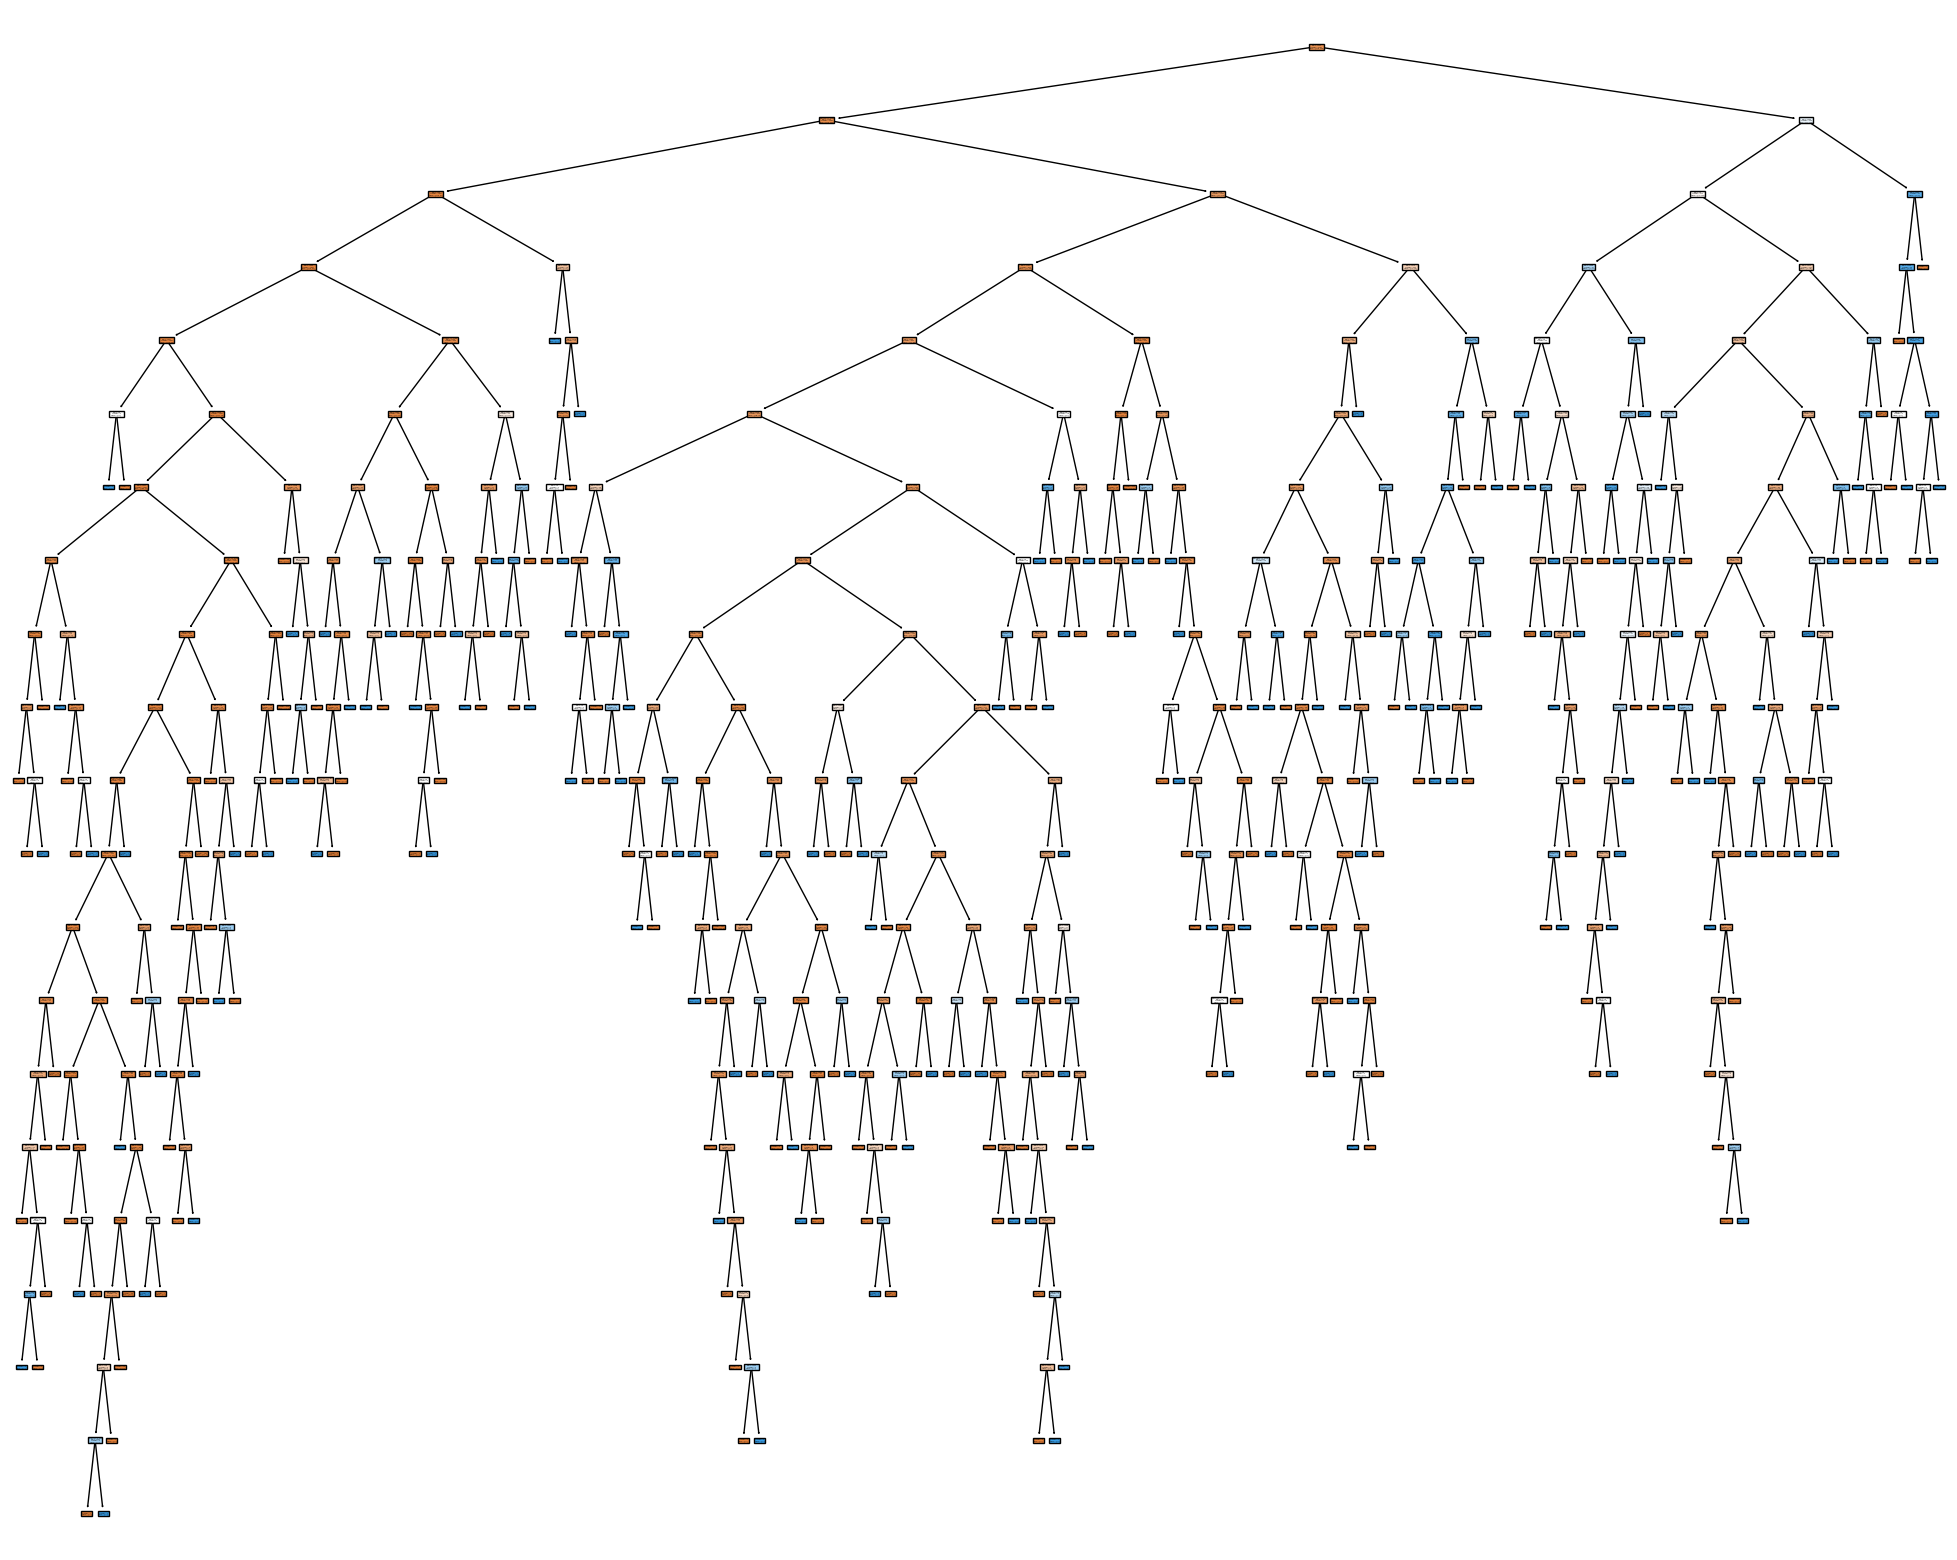

In [30]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(decision_tree,filled=True,feature_names=x.columns)